In [1]:

#importing libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#reading the dataset
dataset=pd.read_csv("/content/dataset.csv")

In [8]:
#used to give the first 5 rows
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#to get the no of rows and coloumns of dataset
dataset.shape


(25, 2)

In [10]:
#to derive the basic statistical data
# count - no of entries , mean , std, 25%,50%,75%- gives the no of values in that percentile range , min- min value, max-max value
dataset.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


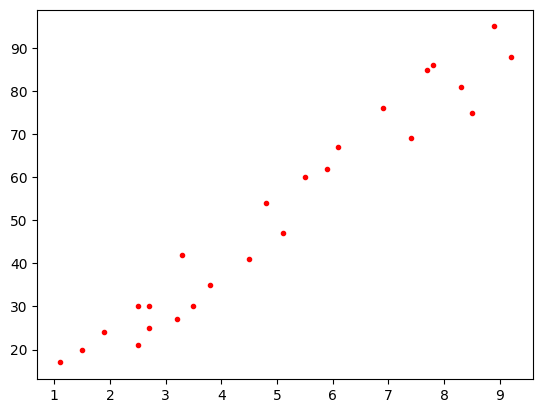

In [21]:
#establishing the relationship between the two coloumns of the table by using plots
x= dataset['Hours']
y=dataset['Scores']
plt.plot(x,y,'r.')

Text(0.5, 1.0, 'No.of studying hours vs Percentage scored')

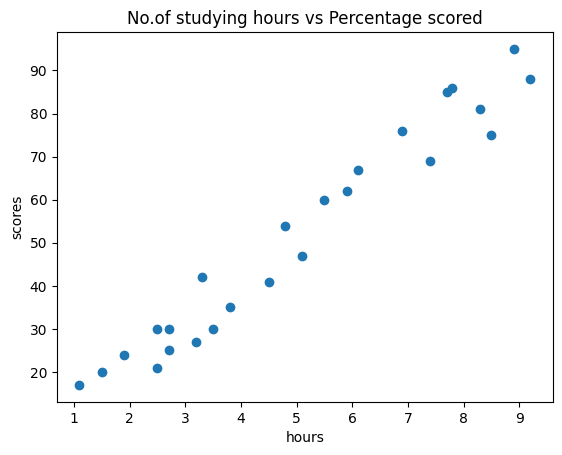

In [18]:
#using scatterplot inorder to observe a pattern
plt.scatter(x,y)
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("No.of studying hours vs Percentage scored")


In [22]:
#from the above plot we observe a linear relationship between x and y. so we must train a model based on linear regression
# iloc is a function of pandas which is used to obtain the specific rows and coloumns of the dataset- similar to slicing operator
# we use [:,-1] to exclude only the last coloumn values which is our target/ label variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
 #we are splitting the testing and training data
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
#from a module called linear module we import LinearRegression algorithm
from sklearn.linear_model import LinearRegression
#we create an instance regressor of the LR algorithm for solving our case
regressor = LinearRegression()
#we fit the training data to the LR model
regressor.fit(X_train, y_train)

LinearRegression()

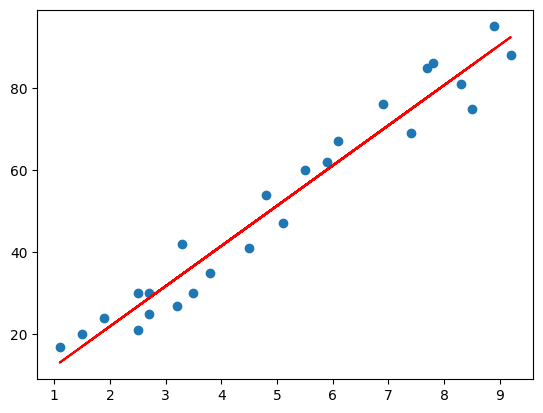

In [30]:
# TO VERIFY HOW WELL THE MODEL FITS THE DATASET
# the regression line is plotted to visualize how well a linear regression model fits the test data. The line represents the predicted values of the target variable based on the input features.
#By plotting the regression line alongside the scatter plot of the test data, you can visually assess how closely the model's predictions align with the actual values.
#The regression line is calculated using the coefficients (regressor.coef_) and the intercept (regressor.intercept_) of the trained linear regression model. These values define the equation of the line and allow you to estimate the target variable for any given input feature value.

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the TEST DATA
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()
#slope between the two plots is almost the same so the model fits the dataset

In [32]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)


[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


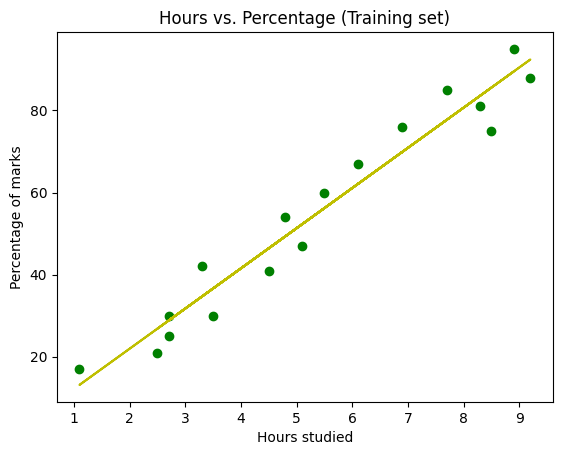

In [34]:
#visualising results for the training data
plt.scatter(X_train, y_train, color="green")
yt_pred= regressor.predict(X_train)
plt.plot(X_train, yt_pred, 'y')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

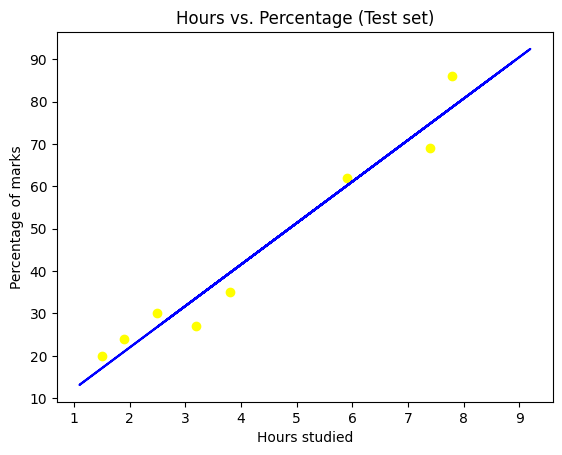

In [41]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [42]:
#creating a dataframe with dictionary input to compare the actual values with predicted results
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [43]:
# to find the percentage for 9.25 hours using our model
dataset = np.array(9.25)
#This line reshapes the dataset array to have a single feature column using the reshape() method.
# The -1 argument indicates that the number of rows is inferred based on the size of the data.
#The 1 argument specifies that there is only one feature column.
dataset = dataset.reshape(-1, 1)
#using our model regressor we call predict() to compute the results
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))
#format is used to insert the results into the string

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [44]:
from sklearn import metrics  # used for evaluation of error and other metrics
#MAE is a commonly used metric to measure the average absolute difference between the predicted and actual values.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables.
#A higher R-squared value indicates a better fit of the model to the data.
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
The R-Square of the model is:  0.9568211104435257
